In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

## Test

In [14]:
path = os.environ['LPRDATADIR']+'xymm/'

pressure = '13bar'
coors  = ('x', 'y')
widths = (10, 10)
frame  = dp.frames[pressure]
ifile = path + dp.xymm_filename(coors, widths, frame, prefix = 'xymm_'+pressure)

cnn.test(ifile)

input filename  /scratch/next/data/NEXT100/pressure_topology/xymm/xymm_13bar_xy_10x10_100.npz
output filename  /scratch/next/data/NEXT100/pressure_topology/xymm/test_cnn_xymm_13bar_xy_10x10_100.npz
--- data set ---
Dataset : 
   labels   : ['esum', 'emax', 'ecount']
   x shape  : (205612, 3, 10, 10)
   y shape  : (205612, 1)
   z labels : ['seg', 'ext']
   z shape  : (205612, 2, 10, 10)

{'loss_function': 'chi2'}
Event Image tensor  (3, 10, 10)
conv :  1  init  (3, 10) , next  (6, 5) , kernel  6
conv :  2  init  (6, 5) , next  (12, 3) , kernel  3
conv :  3  init  (12, 3) , next  (24, 2) , kernel  2
conv :  4  init  (24, 2) , next  (48, 1) , kernel  2
lin  : init  48 , next 6 , next  1
CNN: [200, 3, 10, 10]-> [200, 3, 10, 10]-> [200, 6, 5, 5]-> [200, 6, 5, 5]-> [200, 6, 5, 5]-> [200, 12, 3, 3]-> [200, 12, 3, 3]-> [200, 12, 3, 3]-> [200, 24, 2, 2]-> [200, 24, 2, 2]-> [200, 24, 2, 2]-> [200, 48, 1, 1]-> [200, 48, 1, 1]-> [200, 48, 1, 1]-> [200, 48]-> [200, 6]-> [200, 1]-> 
Epoch:  train 1

True

## RUN CNN

In [15]:
ipath = os.environ['LPRDATADIR']+'xymm/'
opath = 'temp/'

pressure   = '5bar'
coors      = ('x', 'y')
widths     = (10, 10)
labels     = ['esum']
cnn_name   = 'temp_cnn_'
nepochs    = 2
config     = cnn.config
config['loss_function'] = 'MSELoss' # 'MSELoss', 'chi2'

idata, odata = cnn.production(ipath, opath, pressure, coors, widths, labels, nepochs = nepochs, cnn_name = cnn_name, config = config)


input file  :  /scratch/next/data/NEXT100/pressure_topology/xymm/xymm_13bar_xy_10x10_100.npz
output file :  temp//temp_cnn_esum_xymm_13bar_xy_10x10_100.npz
Dataset : 
   labels   : ['esum']
   x shape  : (205612, 1, 10, 10)
   y shape  : (205612, 1)
   z labels : ['seg', 'ext']
   z shape  : (205612, 2, 10, 10)

{'loss_function': 'MSELoss'}
Event Image tensor  (1, 10, 10)
conv :  1  init  (1, 10) , next  (2, 6) , kernel  5
conv :  2  init  (2, 6) , next  (4, 3) , kernel  4
conv :  3  init  (4, 3) , next  (8, 2) , kernel  2
conv :  4  init  (8, 2) , next  (16, 1) , kernel  2
lin  : init  16 , next 2 , next  1
CNN: [200, 1, 10, 10]-> [200, 1, 10, 10]-> [200, 2, 6, 6]-> [200, 2, 6, 6]-> [200, 2, 6, 6]-> [200, 4, 3, 3]-> [200, 4, 3, 3]-> [200, 4, 3, 3]-> [200, 8, 2, 2]-> [200, 8, 2, 2]-> [200, 8, 2, 2]-> [200, 16, 1, 1]-> [200, 16, 1, 1]-> [200, 16, 1, 1]-> [200, 16]-> [200, 2]-> [200, 1]-> 
Epoch:  train 6.65e-02 +- 5.99e-02  validation 2.13e-02 +- 6.34e-03
Epoch:  train 1.83e-02 +- 6.59e

In [25]:
m, n = 2, 10
k, f = 4, 2

mycc = cnn.ExtGoCNN(m, n, k, f)

 Conv  : [ 2 ,  10 ] -> [ 4 ,  7 ], ndim =  196 , k =  4
 Conv  : [ 4 ,  7 ] -> [ 8 ,  4 ], ndim =  128 , k =  4
 Conv  : [ 8 ,  4 ] -> [ 16 ,  3 ], ndim =  144 , k =  2
 Conv  : [ 16 ,  3 ] -> [ 32 ,  2 ], ndim =  128 , k =  2
 Lin   :  128  ->  4
 Lin   :  4  ->  1


## Ana CNN

In [26]:
#path       = os.environ['LPRDATADIR']
#ipath      = path + 'xymm/'
#opath      = path + 'cnn/'
#pressure   = '5bar'
projection = ('x', 'y')
#widths     = (10, 10)
#labels     = ['seg',]

idata, odata = cnn.retrieve_cnn_data(ipath, opath, pressure, projection, widths, labels, cnn_name = cnn_name)

data file :  /scratch/next/data/NEXT100/pressure_topology/xymm/xymm_13bar_xy_10x10_100.npz
cnn file  : temp//temp_cnn_esum_xymm_13bar_xy_10x10_100.npz


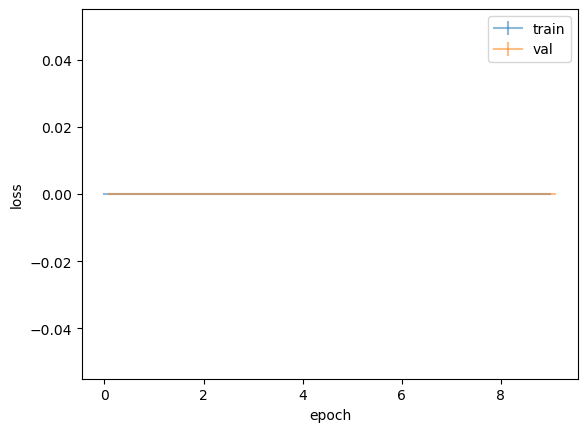

In [27]:
cnn.plot_epochs(odata['epochs'])

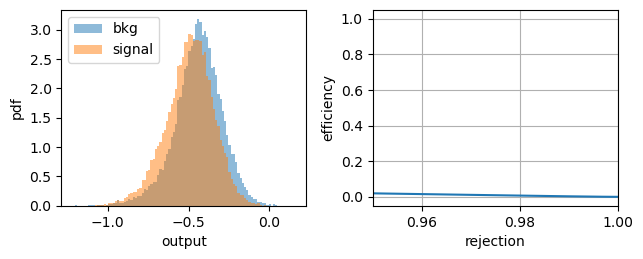

In [28]:
cnn.plot_roc(odata['y'], odata['yp'], 0.95)

event  154094
target test       1
target test pred  0.9983534216880798
success           True
total     test 1.0


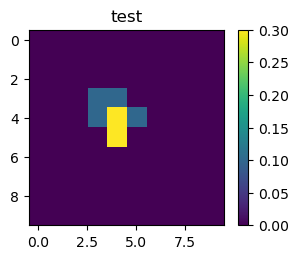

In [22]:
cnn.plot_event(idata, odata, labels)